Answer: Saint Bernadette Soubirous
Answer: Saint Bernadette Soubirous
Answer: Gold Dome
Answer: Saint Bernadette Soubirous
Exiting the chatbot.


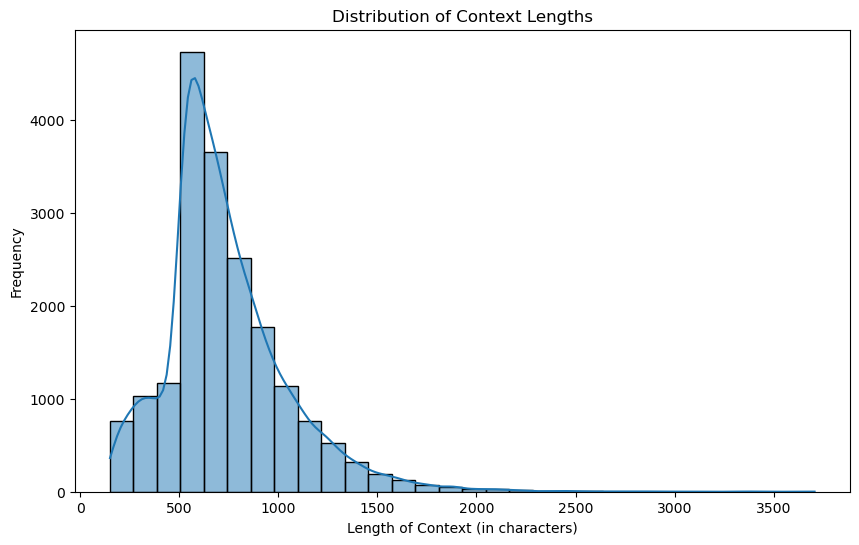

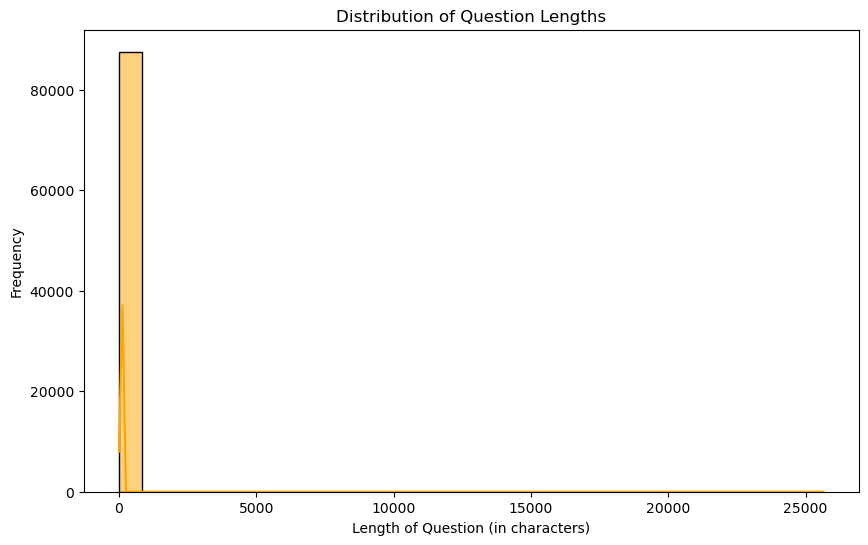

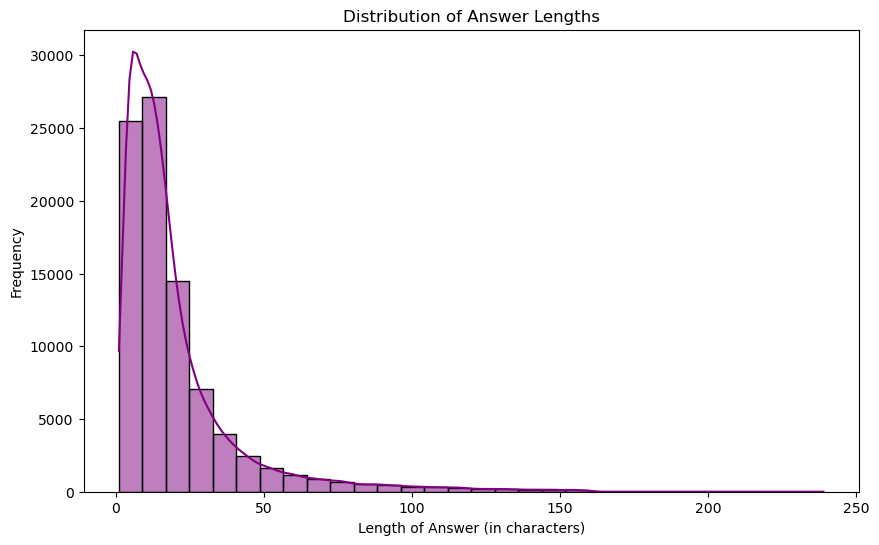

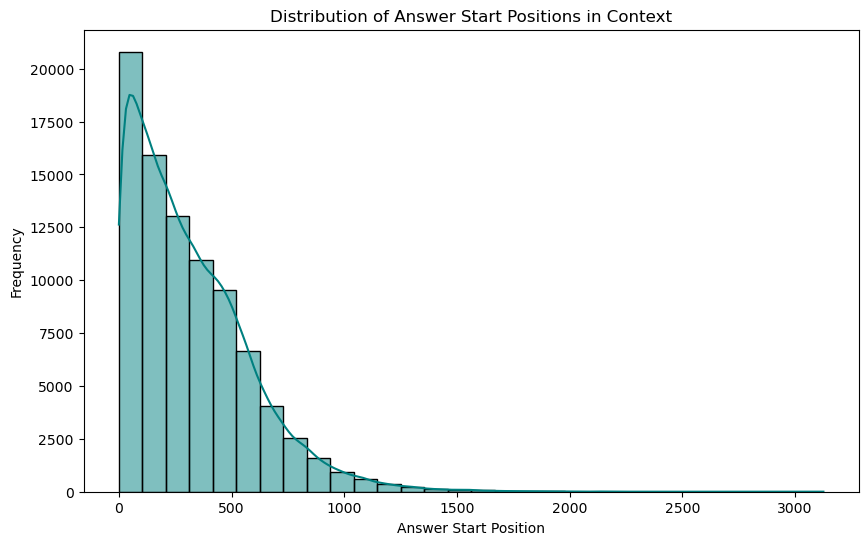

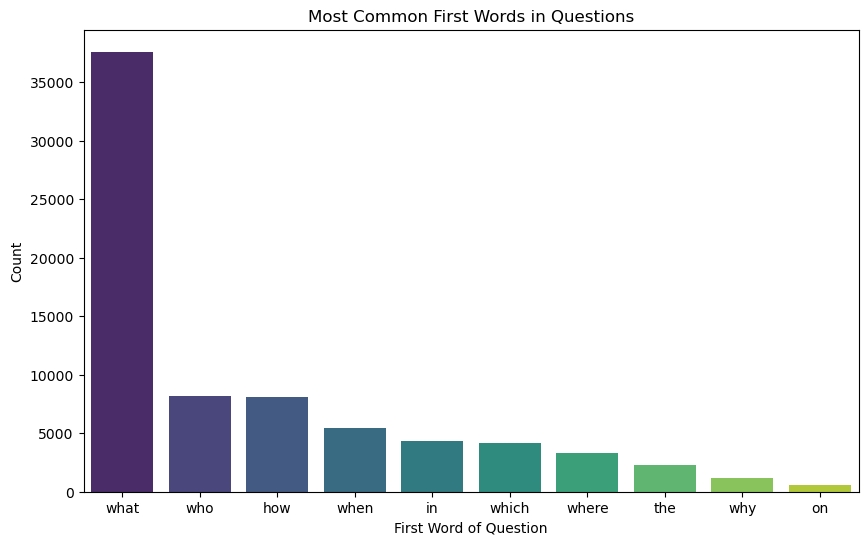

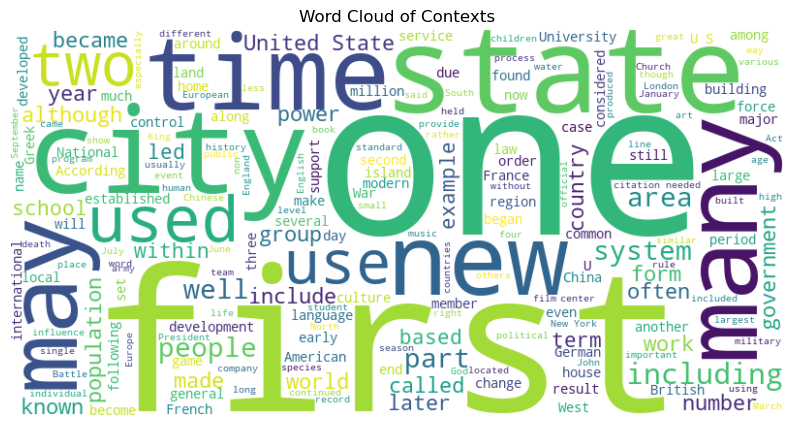

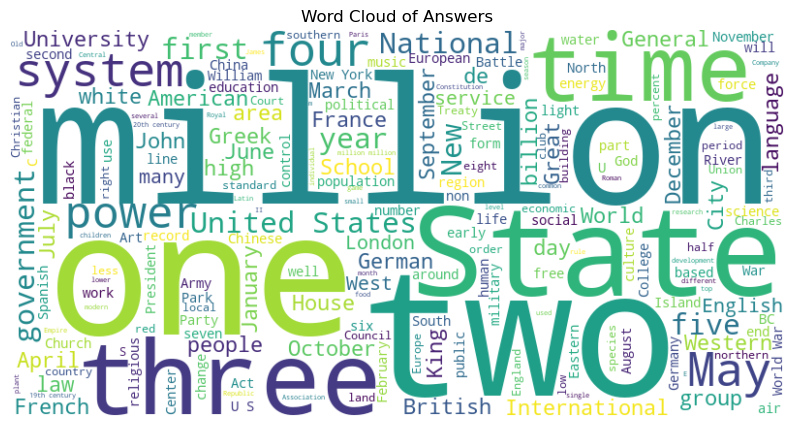

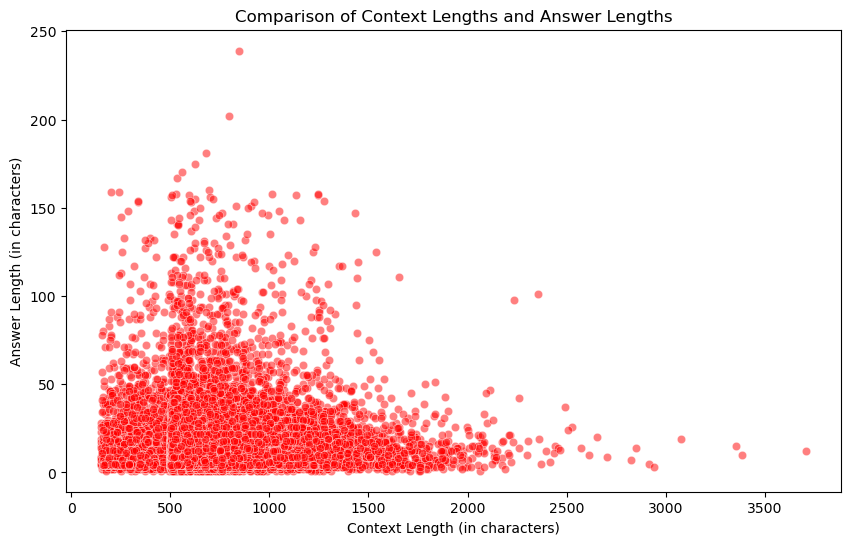

In [2]:
#  Run Chatbot first, then show visualizations after exiting


import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline, AutoModelForQuestionAnswering, Trainer, TrainingArguments, AutoTokenizer
from datasets import load_dataset
import seaborn as sns
from wordcloud import WordCloud


# Chatbot code
def find_best_context(question, contexts):
    return contexts[0]  # Placeholder, improve with keyword matching later

qa_pipeline = pipeline("question-answering", model="distilbert-base-cased-distilled-squad", framework="pt", device=-1)

# Load your data
train_file_path = 'C:/USD/Natural Language Processing and GenAI AAI 520/Final Project/archive/train-v1.1.json'
dev_file_path = 'C:/USD/Natural Language Processing and GenAI AAI 520/Final Project/archive/dev-v1.1.json'

with open(train_file_path, "r") as train_file:
    train_data = json.load(train_file)
with open(dev_file_path, "r") as dev_file:
    dev_data = json.load(dev_file)

contexts = []
questions = []
answers = []
answer_positions = []

# Populate contexts, questions, answers, and answer positions
for article in train_data['data']:
    for paragraph in article['paragraphs']:
        contexts.append(paragraph['context'])  # Add context to contexts list
        for qa in paragraph['qas']:
            questions.append(qa['question'])  # Add question to questions list
            for answer in qa['answers']:
                answers.append(answer['text'])  # Add answer to answers list
                answer_positions.append(answer['answer_start'])  # Add answer start position

# Chatbot loop
while True:
    question = input("Ask a question: ")
    
    if not question.strip():
        print("Question cannot be empty. Please ask a valid question.")
        continue

    if question.lower() == "exit":
        print("Exiting the chatbot.")
        break

    # Find the best context
    context = find_best_context(question, contexts)

    # Get the answer from the model
    result = qa_pipeline(question=question, context=context)
    print(f"Answer: {result['answer']}")
    

# Visualization functions
def plot_visuals(contexts, questions, answers, answer_positions):
    
    # Plot 1: Distribution of Context Lengths
    context_lengths = [len(context) for context in contexts]
    plt.figure(figsize=(10, 6))
    sns.histplot(context_lengths, kde=True, bins=30)
    plt.title('Distribution of Context Lengths')
    plt.xlabel('Length of Context (in characters)')
    plt.ylabel('Frequency')
    plt.show()
    
    # Plot 2: Distribution of Question Lengths
    question_lengths = [len(question) for question in questions]
    plt.figure(figsize=(10, 6))
    sns.histplot(question_lengths, kde=True, bins=30, color='orange')
    plt.title('Distribution of Question Lengths')
    plt.xlabel('Length of Question (in characters)')
    plt.ylabel('Frequency')
    plt.show()
    
    # Plot 3: Distribution of Answer Lengths
    answer_lengths = [len(answer) for answer in answers]
    plt.figure(figsize=(10, 6))
    sns.histplot(answer_lengths, kde=True, bins=30, color='purple')
    plt.title('Distribution of Answer Lengths')
    plt.xlabel('Length of Answer (in characters)')
    plt.ylabel('Frequency')
    plt.show()
    
    # Plot 4: Distribution of Answer Start Positions in Context
    plt.figure(figsize=(10, 6))
    sns.histplot(answer_positions, kde=True, bins=30, color='teal')
    plt.title('Distribution of Answer Start Positions in Context')
    plt.xlabel('Answer Start Position')
    plt.ylabel('Frequency')
    plt.show()
    
    # Plot 5: Most Common First Words in Questions
    first_words = [question.split()[0].lower() for question in questions]
    word_count = pd.Series(first_words).value_counts().head(10)  # Top 10 most common words
    plt.figure(figsize=(10, 6))
    sns.barplot(x=word_count.index, y=word_count.values, palette='viridis')
    plt.title('Most Common First Words in Questions')
    plt.xlabel('First Word of Question')
    plt.ylabel('Count')
    plt.show()
    
    # Plot 6: Word Cloud for Contexts
    combined_contexts = ' '.join(contexts)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_contexts)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Contexts')
    plt.show()
    
    # Plot 7: Word Cloud for Answers
    combined_answers = ' '.join(answers)
    wordcloud_answers = WordCloud(width=800, height=400, background_color='white').generate(combined_answers)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud_answers, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Answers')
    plt.show()
    
    # Plot 8: Comparison of Context Lengths and Answer Lengths
    context_answer_pairs = [(len(context), len(answer)) for context, answer in zip(contexts, answers)]
    df_lengths = pd.DataFrame(context_answer_pairs, columns=['Context Length', 'Answer Length'])
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Context Length', y='Answer Length', data=df_lengths, alpha=0.5, color='red')
    plt.title('Comparison of Context Lengths and Answer Lengths')
    plt.xlabel('Context Length (in characters)')
    plt.ylabel('Answer Length (in characters)')
    plt.show()

# Call the visualization function after chatbot
plot_visuals(contexts, questions, answers, answer_positions)